In [2]:
# Importation des packaques et du dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


# Importation du fichier de scraping
df = pd.read_csv('vgsales_scraping.csv')
#print(df.isnull().sum())

# Scraping Metascore
# On recherche les nombres dans Metascore correspond respectivement à la note et au nombre de vote
r = re.compile(r"[0-9]+")

# On crée les 2 conteneurs qui vont recueillir ces infos
metascorewrap_note = []
metascorewrap_nbvote = []
count = 0

for i in df['metascorewrap']:
    metascorewrap = r.findall(i)
    if len(metascorewrap)>1 :
        #print(count," : ",metascorewrap)
        #print(type(metascorewrap_note))
        metascorewrap_note.append(metascorewrap[0])
        metascorewrap_nbvote.append(metascorewrap[1])
    else :
        metascorewrap_note.append(np.nan)
        metascorewrap_nbvote.append(np.nan)
    count+=1
    
# On recherche les floats dans Userscore correspond respectivement à la note et au nombre de vote
r = re.compile(r"[0-9]+\.?[0-9]+")

# On crée les 2 conteneurs qui vont recueillir ces infos
userscorewrap_note = []
userscorewrap_nbvote = []
count = 0
df['metaNote']=metascorewrap_note
df['metaNbVote']=metascorewrap_nbvote

for i in df['userscorewrap']:
    userscorewrap = r.findall(i)
    if len(userscorewrap)>1 :
        #print(count," : ",userscorewrap)
        #print(type(metascorewrap_note))
        userscorewrap_note.append(userscorewrap[0])
        userscorewrap_nbvote.append(userscorewrap[1])
    else :
        userscorewrap_note.append(np.nan)
        userscorewrap_nbvote.append(np.nan)
    count+=1
df['userNote']=userscorewrap_note
df['userNbVote']=userscorewrap_nbvote
    
# Comparatif entre le nom du dataset et le nom sur Metacritic
samename = []
for i,j in zip(df['Name'],df['gamename']):
    if (i in j) or (j in i) : # Je fais le test dans les 2 sens, voir index 16595
        samename.append(1)
    else :
        samename.append(0)
df['samename']=samename

#print(df['metascorewrap'][52])
#print(df['userscorewrap'][0])

df=df.drop(['metascorewrap','developper','userscorewrap','gamename','nbvotes','description','top','nbratings','metascore','ratings','samename'],axis=1)

# Calcul du nombre de bons jeux (même nom) trouvés
print(df['samename'].value_counts())
print("length :",len(df))

# Suppression des mauvais jeux (pas le même nom)
df.drop(df.loc[df['samename']==0].index, inplace=True)

# Création df Nintendo
df_visu = df
df_visu[['Year','metaNote','metaNbVote','userNote','userNbVote']] = df_visu[['Year','metaNote','metaNbVote','userNote','userNbVote']].fillna(0)
salesByNintendoGame = df_visu[df_visu['Publisher']=='Nintendo']
salesByNintendoGame

1    11540
0     5058
Name: samename, dtype: int64
length : 16598


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,metaNote,metaNbVote,userNote,userNbVote,samename
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76,51,8.1,453,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,84,14,8.5,98,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82,73,8.4,1047,1
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80,73,8.2,293,1
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,83,27,8.2,258,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14968,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02,3,1,0,0,1
15991,15994,Donkey Kong Jungle Beat,Wii,2008.0,Platform,Nintendo,0.00,0.01,0.00,0.00,0.01,78,27,8.6,31,1
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01,70,26,7.5,72,1
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01,82,9,7.9,22,1


In [14]:
# Recherche de série
salesByNintendoGame['serie']=0
for index,i in enumerate(salesByNintendoGame['Name']):
    for y in salesByNintendoGame['Name'] :
        if (i != y) & ((i in y) | (y in i)) :
            salesByNintendoGame['serie'].iloc[index]=1
        elif (salesByNintendoGame['serie'].iloc[index]!=1) :
            salesByNintendoGame['serie'].iloc[index]=0
            
#salesByNintendoGame

<ipython-input-14-2b7b39051822>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesByNintendoGame['serie']=0


In [16]:
print(salesByNintendoGame['serie'].value_counts())
salesByNintendoGame[salesByNintendoGame['serie']==1]

1    254
0    220
Name: serie, dtype: int64


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,metaNote,metaNbVote,userNote,userNbVote,samename,serie
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76,51,8.1,453,1,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,84,14,8.5,98,1,1
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80,73,8.2,293,1,1
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,83,27,8.2,258,1,1
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,80,70,7.0,306,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14301,14304,Metroid Prime: Federation Force,3DS,2016.0,Action,Nintendo,0.02,0.01,0.01,0.00,0.03,64,56,5.5,266,1,1
15991,15994,Donkey Kong Jungle Beat,Wii,2008.0,Platform,Nintendo,0.00,0.01,0.00,0.00,0.01,78,27,8.6,31,1,1
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01,70,26,7.5,72,1,1
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01,82,9,7.9,22,1,1


In [22]:
salesByNintendoGame_platform = pd.get_dummies(salesByNintendoGame['Platform'])
salesByNintendoGame_genre = pd.get_dummies(salesByNintendoGame['Genre'])
fusion = pd.concat([salesByNintendoGame,salesByNintendoGame_platform,salesByNintendoGame_genre],axis=1)
fusion.drop(['Rank','Name','Platform','Genre','Publisher','samename'],axis=1,inplace=True)

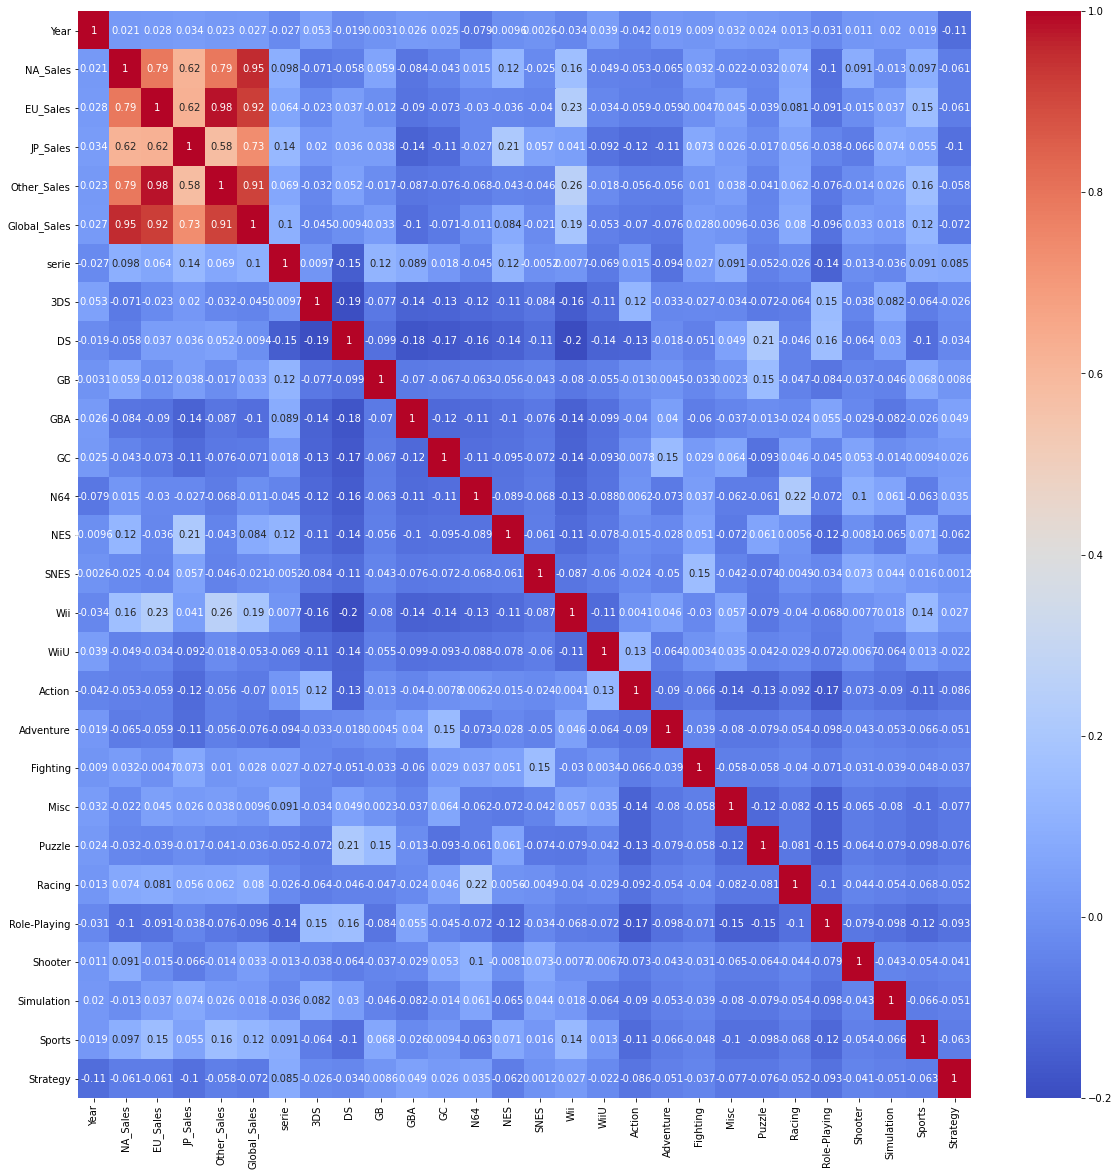

In [28]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit_transform(fusion)
matrice=fusion.corr()
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(matrice, annot=True, cmap='coolwarm');